## Bibliotecas e dados

In [179]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt
import math

# Importando biblioteca para plotagem em 3D
from matplotlib import cm   

# Importando bibliotecas Scikit Learn; 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Utilizando a função mágica:
%matplotlib inline

#### Modelo de treinamento:

In [180]:
# Definindo a semente para gerar valores diferentes:
np.random.seed(42)

# Definindo a quantidade de amostras: 
M = 1000

# Definindo as funções de ENTRADAS (features):
x1_train = np.random.randn(M, 1)
x2_train = 10.0 * np.random.randn(M, 1) - 10.0

# Definindo a função de SAÍDAS (targets):
y_train = x1_train + x2_train

#### Modelo de validação:

In [181]:
# Definindo a semente para gerar valores diferente:
np.random.seed(84)

# Definindo a quantidade de amostras:
M = 1000

# Definindo as funções de ENTRADAS (features):
x1_valid = np.random.randn(M, 1)
x2_valid = 10.0 * np.random.randn(M, 1) - 10.0

# Definindo as funções de SAÍDAS (targets):
y_valid  = x1_valid + x2_valid

## Superfície de ERRO

In [182]:
# Criando a SUPERFÍCIE DE ERRO:

# Definindo o número de iterações:
N = 400

# Definindo valores lINEARMENTE espaçados para os PESOS
a1 = np.linspace(-10.0, 10.0, N)
a2 = np.linspace(-10.0, 10.0, N)

# Criação da malha para plotagem gráfica
A1, A2 = np.meshgrid(a1, a2)

# Criando o vetor para armazenamento dos valores de ERRO:
J =np.zeros((N, N))

#LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A0[iter1][iter2] * x1_train + A1[iter1][iter2] * x2_train
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_train - y_hat))

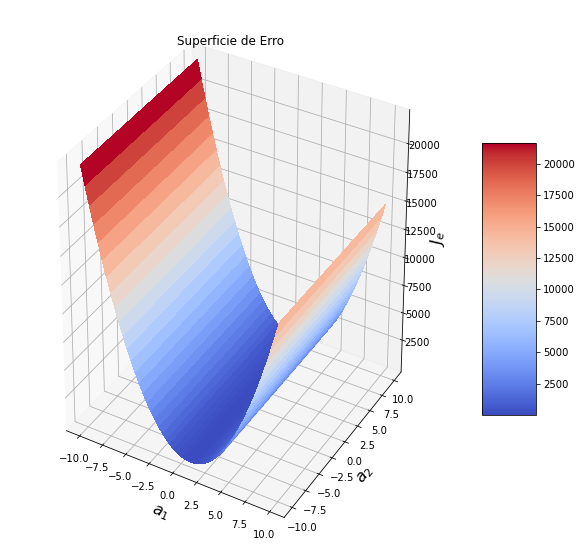

In [183]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=16)
ax.set_ylabel('$a_2$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

## Formula fechada

In [184]:
# Concatenação dos vetores de FEATURES:
X = np.c_[x1_train, x2_train]                 

# Aplicação da formula fechada para encontrar os pesos ÓTIMOS:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_train))
y_hat = a_opt[0, 0] * x1_train + a_opt[1, 0] * x2_train
j_opt = (1/M)*np.sum(np.power((y_train - y_hat), 2))

In [185]:
# Imprimindo os valores encontrados pela FORMULA FECHADA:
print(' O valor de a1 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print(' O valor de a2 ótimo encontrado é: {}'.format(a_opt[1, 0]))

 O valor de a1 ótimo encontrado é: 0.9999999999999973
 O valor de a2 ótimo encontrado é: 0.9999999999999999


## Gradiente descendente

In [186]:
# Definindo o PASSO DE APRENDIZAGEM (alpha):
alpha = 0.005

# Criando a matriz de pesos final para ARMAZENAMENTO:
a = np.zeros((2, 1))

# Definindo os PESOS INICIAIS:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((2, M+1))

# Criando a matriz de erro para treinamento:
jgd_train = np.zeros(M+1)

# Definindo o primeiro valor do erro de treinamento
jgd_train[0] = (1.0/M)*sum(np.power(y_train - X.dot(a), 2))

# Criando a matriz de erro para validação:
jgd_valid = np.zeros(M+1)

# Definindo o primeiro do erro de validação:
jgd_valid[0] = (1.0/M)*sum(np.power(y_valid - X.dot(a), 2))

# Concatenando os valores das FEATURES de TREINAMENTO:
X_train = np.c_[x1_train, x2_train]

# Concatenando os valores das FEATURES de VALIDAÇÃO:
X_valid = np.c_[x1_valid, x2_valid]

In [187]:
# Definindo a iteração inicial
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICO:
grad_hist = np.zeros((3, M))

In [188]:
# LOOP do GRADIENTE:
while iteration < M:
    
    
    gradients = -(2.0/M) * X.T.dot(y_train - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
        
    jgd_train[iteration + 1] = (1.0/M) * sum(np.power((y_train - X_train.dot(a)), 2))
    jgd_valid[iteration + 1] = (1.0/M) * sum(np.power((y_valid - X_valid.dot(a)), 2))
    
    iteration = iteration + 1

In [189]:
# Imprimindo os valores encontrados pelo GRADIENTE:
print('O valor de a1_train ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a2_train ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a1_train ótimo encontrado pelo gradiente é: 0.9992608560877686
O valor de a2_train ótimo encontrado pelo gradiente é: 0.9999977044951707


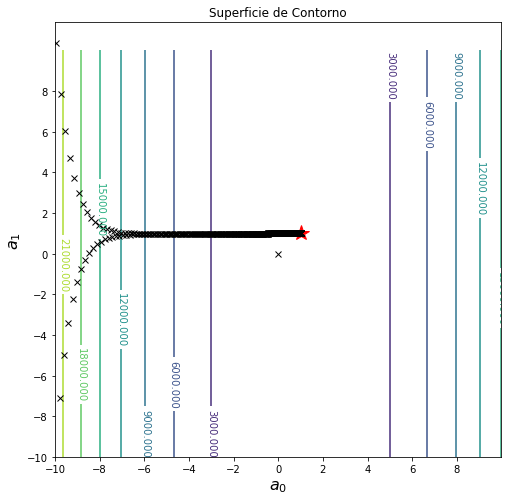

In [190]:
# Plotando a superfície de contorno dos PESOS vs ERRO
fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-10, 10, step=2.0))
plt.yticks(np.arange(-10, 10, step=2.0))
plt.show()

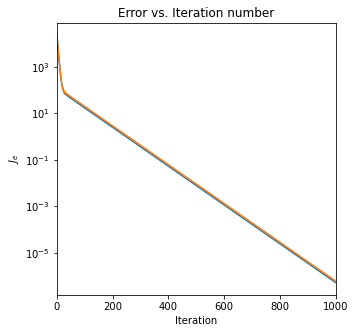

In [191]:
# Plotando o gráfico do ERRO vs NÚMERO DE ITERAÇÕES:

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), jgd_train[0:iteration])
plt.plot(np.arange(0, iteration), jgd_valid[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

## Normalização Mín - Max

In [192]:
# Instanciando o escalonador:
scaler = MinMaxScaler()

# Concatenando ambos os vetores de TREINAMENTO:
X_train = np.c_[x1_valid, x2_valid]

# Concatenando ambos os vetores de VALIDAÇÃO:
X_valid = np.c_[x1_valid, x2_valid]

# Escalonando as FEATURES de TREINAMENTO:
X_train_scaled = scaler.fit_transform(X_train)

# Escalonando as FEATURES de VALIDAÇAO:
X_valid_scaled = scaler.transform(X_valid)

## Formula fechada

In [197]:
# Aplicando a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X_train_scaled).dot(X_train_scaled)).dot(np.transpose(X_train_scaled).dot(y_train))
y_hat = X_train_scaled.dot(a_opt)
j_opt = (1/M)*np.sum(np.power((y_train - y_hat), 2))

In [198]:
# Imprimindo os valores encontrados pela FORMULA FECHADA:
print(' O valor de a1 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print(' O valor de a2 ótimo encontrado é: {}'.format(a_opt[1, 0]))

 O valor de a1 ótimo encontrado é: -8.654628074205618
 O valor de a2 ótimo encontrado é: -9.484266531954447


In [200]:
# Definindo o número de iterações
N = 25

# Definindo os pesos:
a1 = np.linspace(-22.0, 44.0, N)
a2 = np.linspace(-22.0, 44.0, N)

# Criando a malha dos pesos:
A1, A2 = np.meshgrid(a1, a2)

# Atribuido os valores:
x1_train_scaled = X_train_scaled[0:M,0]
x2_train_scaled = X_train_scaled[0:M,1]

# Criando a matriz para armazenamento dos erros:
J = np.zeros((N,N))

# LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A1[iter1][iter2]*x1_train_scaled + A2[iter1][iter2]*x2_train_scaled
        J[iter1][iter2] = (1/M)*np.sum(np.square(y_train - y_hat))

In [ ]:
# Batch gradient descendent solution.

# learning rate.
alpha = 0.7
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing training error values.
Jgd_t = np.zeros(n_iterations+1)

# Create array for storing validation error values.
Jgd_v = np.zeros(n_iterations+1)

#FELIPE: Erro com conjunto de treinamento.
Jgd_t[0] = (1/M)*sum(np.power(y_t - scaled_X_t.dot(a), 2))

#FELIPE: Erro com conjunto de validação.
Jgd_v[0] = (1/M)*sum(np.power(y_v - scaled_X_v.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))